# 2.1 신경망과의 첫 만남

In [1]:
## MNIST 데이터셋 로드
from keras.datasets import mnist

## train_*: 훈련 세트(training set), test_*: 테스트 세트(test set)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape ## (60000, 28, 28) => 6만개의 이미지, 각 이미지는 28x28 픽셀

(60000, 28, 28)

In [3]:
len(train_labels) ## 60000 => 6만개의 레이블

60000

In [4]:
train_labels ## 훈련 세트의 레이블 확인

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape ## (10000, 28, 28) => 1만개의 이미지, 각 이미지는 28x28 픽셀

(10000, 28, 28)

In [6]:
len(test_labels) ## 10000 => 1만개의 레이블

10000

In [7]:
test_labels ## 테스트 세트의 레이블 확인

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
## 신경망 구조
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'), ## 512개의 유닛
    layers.Dense(10, activation='softmax') ## 10개의 확률 점수가 들어있는 배열을 반환하는 소프트맥스 층
])

In [9]:
## 신경망 컴파일
model.compile(optimizer='rmsprop', ## 옵티마이저: rmsprop
                loss='sparse_categorical_crossentropy', ## 손실 함수: sparse_categorical_crossentropy
                metrics=['accuracy']) ## 측정 지표: 정확도

In [10]:
## 이미지 데이터 준비 => 0~255 사이의 값인 uint8 타입의 (60000, 28, 28) 크기를 가진 배열을 0과 1 사이의 값인 float32 타입의 (60000, 28 * 28) 크기로 변환
train_images = train_images.reshape((60000, 28 * 28)) ## 2차원 배열을 1차원 배열로 변환
train_images = train_images.astype('float32') / 255 ## 정규화
test_images = test_images.reshape((10000, 28 * 28)) ## 2차원 배열을 1차원 배열로 변환
test_images = test_images.astype('float32') / 255 ## 정규화

In [11]:
## Catetorically encode the labels
# from keras.utils import to_categorical

## One-hot encoding
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [12]:
## 신경망 모델 훈련
model.fit(train_images, train_labels, epochs=5, batch_size=128) ## 5번의 에포크 동안 훈련, 미니 배치 크기는 128
## 훈련하는 동안 손실과 정확도 지표를 출력  
## accuracy: 훈련 데이터에 대한 정확도, loss: 훈련 데이터에 대한 손실
## epochs(에포크): 전체 훈련 데이터에 수행하는 각 반복

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8736 - loss: 0.4423
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9667 - loss: 0.1161
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.0733
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0493
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9904 - loss: 0.0341


In [13]:
## 모델을 사용하여 예측 만들기
test_digits = test_images[0:10] ## 테스트 데이터에서 숫자 이미지를 선택
predictions = model.predict(test_digits) ## 이미지에 대한 예측을 만듦
predictions[0] ## 첫 번째 예측

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([6.1563151e-07, 2.8172980e-09, 3.9428760e-05, 1.2424696e-04,
       1.9504869e-10, 1.0206078e-07, 2.8430114e-11, 9.9982166e-01,
       4.2598740e-06, 9.6341118e-06], dtype=float32)

In [14]:
predictions[0].argmax() ## 가장 높은 확률을 가진 클래스

7

In [15]:
predictions[0][7] ## 7에 대한 확률

0.99982166

In [16]:
test_labels[0] ## 실제 레이블

7

In [17]:
## 새로운 데이터에서 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels) ## 테스트 데이터에 대한 정확도 계산
print(f"테스트 정확도: {test_acc}") ## 테스트 정확도 출력

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.9759 - loss: 0.0786
테스트 정확도: 0.9794999957084656


# 2.2 신경망을 위한 데이터 표현

In [18]:
# sclar tensor (0차원(0D) 텐서)
import numpy as np
x = np.array(12)
x

array(12)

In [19]:
x.ndim ## 0차원 텐서의 축 개수

0

In [20]:
# vector tensor (1차원(1D) 텐서)
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [21]:
x.ndim ## 1차원 텐서의 축 개수

1

In [22]:
# matrix tensor (2차원(2D) 텐서)
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim ## 2차원 텐서의 축 개수

2

In [23]:
# 3D tensor
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim ## 3차원 텐서의 축 개수

3

In [24]:
## MNIST 데이터셋으로 텐서의 핵심 속성 확인
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim) ## 3차원 텐서
print(train_images.shape) ## (60000, 28, 28)
print(train_images.dtype) ## uint8

3
(60000, 28, 28)
uint8


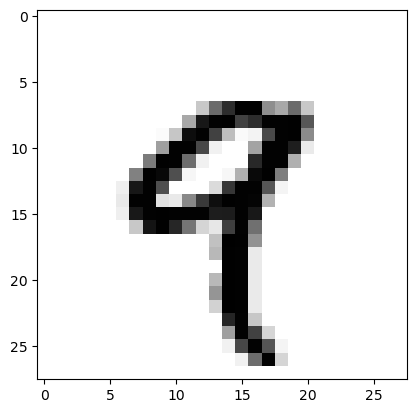

In [25]:
## 5번째 이미지 출력
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [26]:
train_labels[4]

9

In [27]:
## 넘파이로 텐서 조작
my_slice = train_images[10:100] ## 10에서 100번째까지 숫자를 선택
my_slice.shape ## (90, 28, 28)

(90, 28, 28)

In [28]:
my_slice = train_images[10:100, :, :] ## 위와 동일
my_slice.shape

(90, 28, 28)

In [29]:
my_slice = train_images[10:100, 0:28, 0:28] ## 위와 동일
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[:, 14:, 14:] ## 모든 이미지에서 가운데 14x14 픽셀 선택
my_slice.shape ## (60000, 14, 14)

(60000, 14, 14)

In [31]:
my_slice = train_images[:, 7:-7, 7:-7] ## 위와 동일, 음수 인덱스도 사용가능
my_slice.shape

(60000, 14, 14)

In [32]:
## 배치 데이터
## MNIST 숫자 데이터에서 크기가 128인 배치를 만들기
batch = train_images[:128] ## 첫 번째 배치
batch = train_images[128:256] ## 두 번째 배치

n=3
batch = train_images[128 * n:128 * (n + 1)] ## n번째 배치

# 2.3. 신경망의 톱니바퀴: 텐서 연산

In [33]:
## 텐서 덧셈 연산
keras.layers.Dense(512, activation='relu') ## Dense 층 생성

<Dense name=dense_2, built=False>

In [34]:
## 원소별 연산
## relu 연산
def naive_relu(x):
    assert len(x.shape) == 2 ## x는 2D 넘파이 배열
    
    x = x.copy() ## 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [35]:
## 덧셈 연산
def naive_add(x, y):
    assert len(x.shape) == 2 ## x와 y는 2D 넘파이 배열
    assert x.shape == y.shape
    
    x = x.copy() ## 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [36]:
## 곱셈 연산
def naive_mul(x, y):
    assert len(x.shape) == 2 ## x와 y는 2D 넘파이 배열
    assert x.shape == y.shape
    
    x = x.copy() ## 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] *= y[i, j]
    return x

In [37]:
## 뻴셈 연산
def naive_sub(x, y):
    assert len(x.shape) == 2 ## x와 y는 2D 넘파이 배열
    assert x.shape == y.shape
    
    x = x.copy() ## 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] -= y[i, j]
    return x

In [38]:
## 브로드캐스팅
import numpy as np

x = np.random.random((64, 3, 32, 10)) ## x는 (64, 3, 32, 10) 크기의 랜덤 텐서
y = np.random.random((32, 10)) ## y는 (32, 10) 크기의 랜덤 텐서
z = np.maximum(x, y) ## 출력 z의 크기는 x와 동일
z.ndim ## 4

4

In [39]:
## 텐서 크기 변환
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
x.shape ## (3, 2)

(3, 2)

In [40]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [41]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [42]:
## 행렬의 전치
x = np.zeros((300, 20)) ## 모두 0으로 채워진 (300, 20) 크기의 행렬
x = np.transpose(x)
x.shape ## (20, 300)

(20, 300)